In [1]:
# first of all we need to import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import datetime as dt

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from ydata_profiling import ProfileReport
from google.cloud import bigquery

In [2]:
# Then we create a BigQuery client object to pull the data into the workbench environment, and just like in the BigQuery environment, we pull our data with SQL commands and bring them into a dataframe format.
client = bigquery.Client()

raw_data = client.query("SELECT * FROM `cltv-prediction01.cltv_data.flo_data_20k`").to_dataframe()
df = raw_data.copy()
raw_data.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,2730793e-3908-11ea-85d6-000d3a38a36f,Mobile,Mobile,2019-07-29,2020-06-19,2020-06-19,2019-07-29,1.00,1.00,34.99,279.99,[ERKEK]
1,24ad160c-2091-11ea-bb1d-000d3a38a36f,Mobile,Mobile,2019-07-15,2020-06-19,2020-06-19,2019-07-15,3.00,1.00,79.99,1077.00,[AKTIFSPOR]
2,7343fd9e-d631-11e9-93bc-000d3a38a36f,Mobile,Mobile,2019-08-18,2020-06-19,2020-06-19,2019-08-18,1.00,1.00,79.97,177.88,[KADIN]
3,e5c720b8-b029-11e9-9757-000d3a38a36f,Mobile,Mobile,2019-03-21,2020-06-19,2020-06-19,2019-03-21,1.00,1.00,339.96,183.96,[KADIN]
4,ccd45ae4-dfc2-11e9-957d-000d3a38a36f,Mobile,Mobile,2019-09-25,2020-06-19,2020-06-19,2019-09-25,1.00,1.00,89.99,213.29,[AKTIFSPOR]


In [3]:
# we have about 20.000 row and 12 feature 
print("shape of the original data", df.shape)
df.head()

shape of the original data (19945, 12)


,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,2730793e-3908-11ea-85d6-000d3a38a36f,Mobile,Mobile,2019-07-29,2020-06-19,2020-06-19,2019-07-29,1.00,1.00,34.99,279.99,[ERKEK]
1,24ad160c-2091-11ea-bb1d-000d3a38a36f,Mobile,Mobile,2019-07-15,2020-06-19,2020-06-19,2019-07-15,3.00,1.00,79.99,1077.00,[AKTIFSPOR]
2,7343fd9e-d631-11e9-93bc-000d3a38a36f,Mobile,Mobile,2019-08-18,2020-06-19,2020-06-19,2019-08-18,1.00,1.00,79.97,177.88,[KADIN]
3,e5c720b8-b029-11e9-9757-000d3a38a36f,Mobile,Mobile,2019-03-21,2020-06-19,2020-06-19,2019-03-21,1.00,1.00,339.96,183.96,[KADIN]
4,ccd45ae4-dfc2-11e9-957d-000d3a38a36f,Mobile,Mobile,2019-09-25,2020-06-19,2020-06-19,2019-09-25,1.00,1.00,89.99,213.29,[AKTIFSPOR]


In [4]:
# We received the data from BigQuery, so the date columns seem to be of the wrong type, we have to fix them.
df.dtypes

master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      dbdate
last_order_date                       dbdate
last_order_date_online                dbdate
last_order_date_offline               dbdate
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object

In [5]:
# get column names as a list
date_columns = list(["first_order_date","last_order_date","last_order_date_online","last_order_date_offline"])

for column in date_columns:
    df[column] = pd.to_datetime(df[column])

In [6]:
# profiling
profile = ProfileReport(df, title="FLO Profiling Report")
profile.to_file("FLO_Profiling_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# In order to observe the outlier values in the columns containing the number of orders and order amounts in both online and offline channels, let's simply visualize these columns with the boxplot.
order_columns = ["order_num_total_ever_online","order_num_total_ever_offline"]
value_columns = ["customer_value_total_ever_online","customer_value_total_ever_offline"]

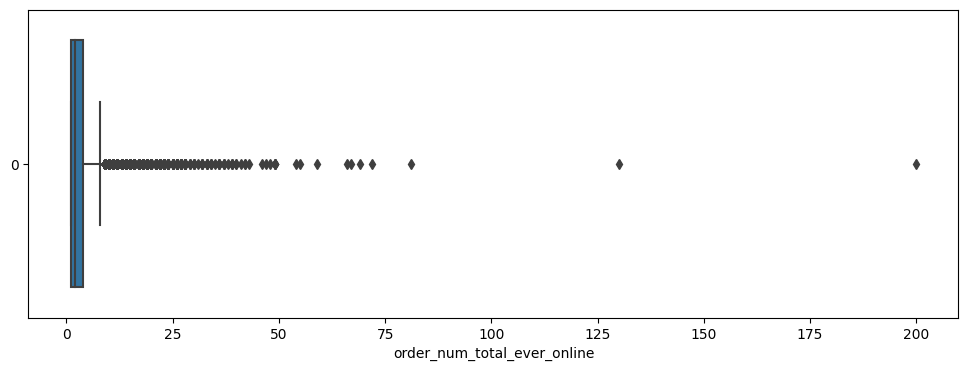

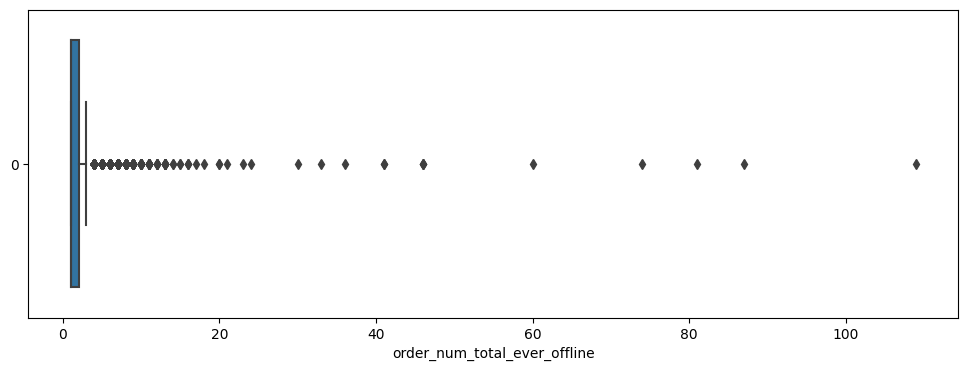

In [8]:
for x in order_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(df[x], orient="h")
    plt.xlabel(x)
    plt.show()

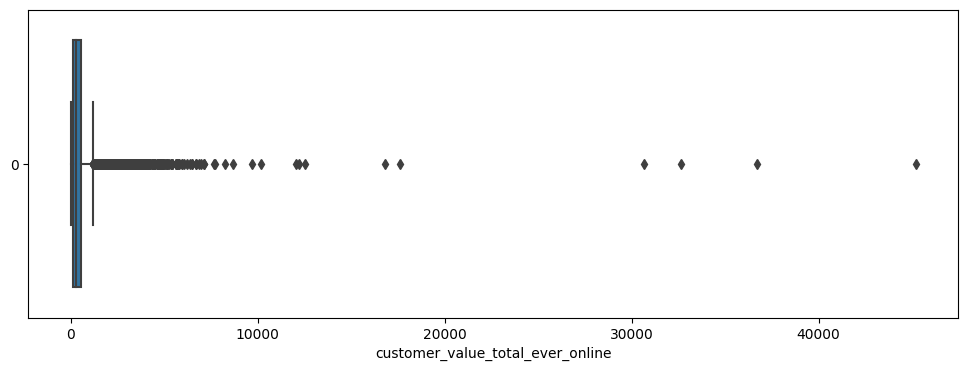

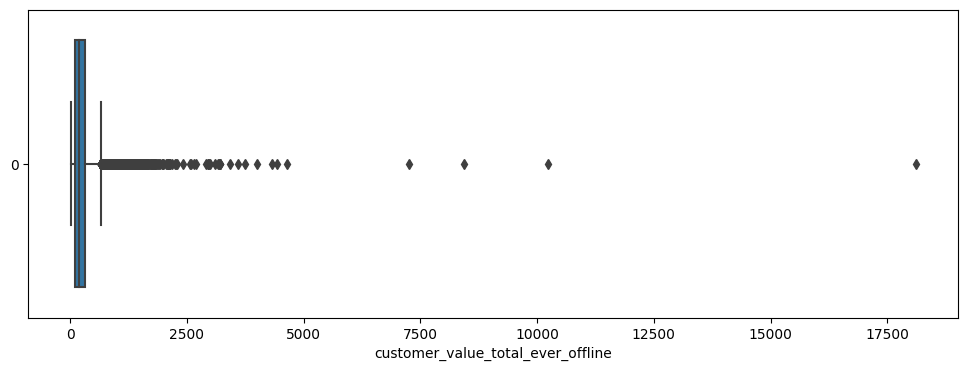

In [9]:
for x in value_columns:
    plt.figure(figsize=(12, 4))
    sns.boxplot(df[x], orient="h")
    plt.xlabel(x)
    plt.show()

In [10]:
# let's write a simple function to see the missing values, this function will return the number of missing values and percentage of missing values.
def missing_data_report(data):
    # calculate the number of missing values
    missing_values = data.isnull().sum()

    # calculate the percentage of the missing values
    percent_missing = (missing_values / data.shape[0]) * 100

    # merge the results into a DataFrame.
    result = pd.DataFrame({
        "number of missing values": missing_values,
        "percentage of missing values": percent_missing
    })

    # sort the results by number of missing values
    result = result.sort_values(by="number of missing values", ascending=False)

    return result

missing_data_report(df)

,number of missing values,percentage of missing values
master_id,0,0.00
order_channel,0,0.00
last_order_channel,0,0.00
first_order_date,0,0.00
last_order_date,0,0.00
last_order_date_online,0,0.00
last_order_date_offline,0,0.00
order_num_total_ever_online,0,0.00
order_num_total_ever_offline,0,0.00
customer_value_total_ever_offline,0,0.00


In [11]:
df.describe().T.to_csv("summary_of_data.csv")

In [12]:
# There are different methods to identify outliers, in this project I will use the IQR method. Let's see these outliers, I have written a simple function to see outliers, in this function we need to write the values Q1 and Q3.
def detect_outliers(data, q1 = 0.25, q3 = 0.75, noe = 5):
    outliers = {}
    for column in data.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            Q1 = data[column].quantile(q1)
            Q3 = data[column].quantile(q3)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outlier_indices = (data[column] < lower_bound) | (data[column] > upper_bound)
            outliers[column] = data[column][outlier_indices]
            
    return pd.DataFrame(outliers).head(noe)

In [13]:
detect_outliers(df, q1 = 0.01, q3 = 0.99, noe = 10)

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
342,72.00,NaN,NaN,NaN
619,54.00,NaN,NaN,NaN
2279,NaN,20.00,3104.63,NaN
2906,NaN,74.00,4640.77,NaN
3517,49.00,NaN,NaN,NaN
3641,66.00,NaN,NaN,17599.89
3645,200.00,NaN,NaN,45220.13
3751,49.00,NaN,NaN,NaN
3840,NaN,NaN,NaN,12545.37
4163,49.00,NaN,NaN,NaN


In [14]:
# Now that we have seen our outliers, we can either discard these outliers from the dataset or suppress them according to the values we want, we said that each observation is important, so we will suppress the observations that contain these outliers.
def outlier_thresholds(data, variable, q1 = 0.25, q3 = 0.75):
    Q1 = data[variable].quantile(q1)
    Q3 = data[variable].quantile(q3)
    interquantile_range = Q3 - Q1
    up_limit = Q1 + 1.5 * interquantile_range
    low_limit = Q3 - 1.5 * interquantile_range
    return low_limit, up_limit

 
def replace_with_thresholds(data, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_thresholds(data, variable, q1, q3)
    data.loc[(data[variable] < low_limit), variable] = low_limit.round()
    data.loc[(data[variable] > up_limit), variable] = up_limit.round()

In [15]:
clean_data = df.copy()

In [16]:
replace_with_thresholds(clean_data, "order_num_total_ever_online", q1 = 0.01, q3 = 0.99)
replace_with_thresholds(clean_data, "order_num_total_ever_offline", q1 = 0.01, q3 = 0.99)
replace_with_thresholds(clean_data, "customer_value_total_ever_offline", q1 = 0.01, q3 = 0.99)
replace_with_thresholds(clean_data, "customer_value_total_ever_online", q1 = 0.01, q3 = 0.99)

In [17]:
detect_outliers(clean_data, q1 = 0.01, q3 = 0.99)

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online


# creating metrics to calculate CLTV

In [18]:
# We use Vertex Ai Workbench for these calculations because of the high computing power capacity offered by Google. 

In [19]:
# Create a new more simple dataframe to calculate the cltv easily
clv_data = clean_data[["master_id",
                      "first_order_date",
                      "last_order_date",
                      "order_num_total_ever_online",
                      "order_num_total_ever_offline",
                      "customer_value_total_ever_offline",
                      "customer_value_total_ever_online"]]

In [20]:
clean_data.to_csv("clean_data_for_cltv.csv")

In [21]:
# We set the analysis date as 2 days after the last date in the dataset for this project.
last_day_on_data = clv_data.last_order_date.max()
analysis_day = last_day_on_data + dt.timedelta(days=2)

a_week = 7

In [22]:
# Tenure = Analysis day - Customer's first order date / 7. Tenure metric should be weekly.

clv_data["T_weekly"] = analysis_day - clv_data["first_order_date"]
clv_data["T_weekly"] = ((clv_data["T_weekly"] // pd.Timedelta(days=1)) / a_week).round()

In [23]:
# Recency = Customer's last order date - Customer's first order date / 7. Recency value should be daily, weekly or yearly but we get it weekly.

clv_data["recency_weekly"] = clv_data["last_order_date"] - clv_data["first_order_date"]
clv_data["recency_weekly"] = ((clv_data["recency_weekly"] // pd.Timedelta(days=1)) / a_week).round()

In [24]:
# Frequency = Total number of transaction. Minimum frequency should be 2 to calculate the CLTV.

clv_data["frequency"] = (clv_data["order_num_total_ever_online"] + clv_data["order_num_total_ever_offline"]).round()
clv_data = clv_data[clv_data["frequency"] > 2]

In [25]:
# Monetary = Total purchase amount / Total number of transaction.

clv_data["monetary_avg"] = ((clv_data["customer_value_total_ever_offline"] + clv_data["customer_value_total_ever_online"]) / clv_data["frequency"]).round()

In [26]:
clv_data.head()

,master_id,first_order_date,last_order_date,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,T_weekly,recency_weekly,frequency,monetary_avg
1,24ad160c-2091-11ea-bb1d-000d3a38a36f,2019-07-15,2020-06-19,3.00,1.00,79.99,1077.00,98.00,49.00,4.00,289.00
5,da5fb914-1907-11ea-9213-000d3a38a36f,2019-11-25,2020-06-19,3.00,2.00,289.98,335.97,79.00,30.00,5.00,125.00
8,81831074-d6d2-11e9-93bc-000d3a38a36f,2019-09-01,2021-03-02,1.00,2.00,445.66,261.98,91.00,78.00,3.00,236.00
9,434b1d90-a2fe-11e9-a2fc-000d3a38a36f,2019-03-22,2021-03-02,1.00,2.00,274.97,59.99,115.00,102.00,3.00,112.00
10,1618c94a-aba9-11e9-a2fc-000d3a38a36f,2018-03-27,2021-03-02,7.00,1.00,79.99,589.96,166.00,153.00,8.00,84.00


In [27]:
# bg/nbd model
from lifetimes import BetaGeoFitter

# fit the model
bgf = BetaGeoFitter(penalizer_coef=0.001)

bgf.fit(clv_data["frequency"],
        clv_data["recency_weekly"],
        clv_data["T_weekly"])

# predict for 3 months
three_month = 4 * 3
clv_data["exp_sales_3_month"] = bgf.conditional_expected_number_of_purchases_up_to_time(three_month,
                                                                                        clv_data["frequency"],
                                                                                        clv_data["recency_weekly"],
                                                                                        clv_data["T_weekly"])

# predict for 6 months
six_months = 4 * 6
clv_data["exp_sales_6_month"] = bgf.conditional_expected_number_of_purchases_up_to_time(six_months,
                                                                                        clv_data["frequency"],
                                                                                        clv_data["recency_weekly"],
                                                                                        clv_data["T_weekly"])

In [28]:
# gamma gamma model
from lifetimes import GammaGammaFitter

# fit the model
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(clv_data['frequency'], clv_data['monetary_avg'])

# get predicts
clv_data["exp_average_value"] = ggf.conditional_expected_average_profit(clv_data['frequency'],
                                                                       clv_data['monetary_avg'])

In [29]:
# calculate the customer life time value

clv_data["clv"] = ggf.customer_lifetime_value(bgf,
                                   clv_data['frequency'],
                                   clv_data['recency_weekly'],
                                   clv_data['T_weekly'],
                                   clv_data['monetary_avg'],
                                   time=6,  # 6 months
                                   freq="W",  # W = Week
                                   discount_rate=0.01)

In [36]:
clv_data[["master_id","exp_sales_6_month","exp_average_value","clv"]]

,master_id,exp_sales_6_month,exp_average_value,clv
1,24ad160c-2091-11ea-bb1d-000d3a38a36f,1.11,299.54,348.22
5,da5fb914-1907-11ea-9213-000d3a38a36f,1.40,129.10,189.20
8,81831074-d6d2-11e9-93bc-000d3a38a36f,1.01,247.87,263.00
9,434b1d90-a2fe-11e9-a2fc-000d3a38a36f,0.88,118.38,109.90
10,1618c94a-aba9-11e9-a2fc-000d3a38a36f,1.19,85.88,107.49
...,...,...,...,...
19939,c1486df4-3da1-11ea-9e19-000d3a38a36f,1.31,160.22,220.43
19940,e1f4e5c2-63a9-11ea-a6dc-000d3a38a36f,1.38,148.75,216.16
19941,265d02a8-253e-11ea-bf27-000d3a38a36f,1.18,228.28,281.46
19943,6d0a664c-ad01-11e9-a2fc-000d3a38a36f,1.22,105.50,135.50


In [31]:
clv_data["customer_segment"] = pd.qcut(clv_data["clv"], 4, labels=["D", "C", "B", "A"])

In [38]:
clv_data[["master_id","exp_sales_6_month","exp_average_value","clv","customer_segment"]]

,master_id,exp_sales_6_month,exp_average_value,clv,customer_segment
1,24ad160c-2091-11ea-bb1d-000d3a38a36f,1.11,299.54,348.22,A
5,da5fb914-1907-11ea-9213-000d3a38a36f,1.40,129.10,189.20,B
8,81831074-d6d2-11e9-93bc-000d3a38a36f,1.01,247.87,263.00,A
9,434b1d90-a2fe-11e9-a2fc-000d3a38a36f,0.88,118.38,109.90,D
10,1618c94a-aba9-11e9-a2fc-000d3a38a36f,1.19,85.88,107.49,D
...,...,...,...,...,...
19939,c1486df4-3da1-11ea-9e19-000d3a38a36f,1.31,160.22,220.43,B
19940,e1f4e5c2-63a9-11ea-a6dc-000d3a38a36f,1.38,148.75,216.16,B
19941,265d02a8-253e-11ea-bf27-000d3a38a36f,1.18,228.28,281.46,A
19943,6d0a664c-ad01-11e9-a2fc-000d3a38a36f,1.22,105.50,135.50,C


In [43]:
customer_segment_stats = clv_data.groupby("customer_segment").describe().T
customer_segment_stats.to_csv("customer_segment_stats.csv")

In [34]:
segment_A_customers = clv_data[clv_data["customer_segment"] == "A"]

In [35]:
segment_A_customers.to_csv("segment_A_customer.csv")

In [50]:
from google.cloud import storage

clv_data.to_csv("clv_data.csv")

# save the DataFrame to a CSV file
with open("clv_data.csv", "w") as f:
    clv_data.to_csv(f)

# upload the CSV file to Cloud Storage
gcp_bucket_name = "datasets-for-cltv"
gcp_project_id = "cltv-prediction"
destination_blob_name = "clv_data.csv"

storage_client = storage.Client()
bucket = storage_client.bucket(gcp_bucket_name)
blob = bucket.blob(destination_blob_name)
blob.upload_from_filename(destination_blob_name)

print("File {} uploaded to {}.".format(destination_blob_name, gcp_bucket_name))

File clv_data.csv uploaded to datasets-for-cltv.
